In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('OHtop50.csv')
df.head(1)

,Unnamed: 0,Pitch_Type,inning,run_difference,ball_count,strike_count,outs,pitch_num_ab,on_1b,on_2b,on_3b,batter_stance,Pitcher_name_Andrew Cashner,Pitcher_name_CC Sabathia,Pitcher_name_Carlos Carrasco,Pitcher_name_Carlos Martinez,Pitcher_name_Chris Archer,Pitcher_name_Chris Sale,Pitcher_name_Clayton Kershaw,Pitcher_name_Cole Hamels,Pitcher_name_Corey Kluber,Pitcher_name_Dallas Keuchel,Pitcher_name_Drew Pomeranz,Pitcher_name_Ervin Santana,Pitcher_name_Gerrit Cole,Pitcher_name_Gio Gonzalez,Pitcher_name_Ian Kennedy,Pitcher_name_J.A. Happ,Pitcher_name_Jacob deGrom,Pitcher_name_Jake Arrieta,Pitcher_name_Jake Odorizzi,Pitcher_name_James Shields,Pitcher_name_Jason Hammel,Pitcher_name_Jeff Samardzija,Pitcher_name_Jeremy Hellickson,Pitcher_name_Jimmy Nelson,Pitcher_name_John Lackey,Pitcher_name_Johnny Cueto,Pitcher_name_Jon Lester,Pitcher_name_Jose Quintana,Pitcher_name_Julio Teheran,Pitcher_name_Justin Verlander,Pitcher_name_Kevin Gausman,Pitcher_name_Kyle Gibson,Pitcher_name_Kyle Hendricks,Pitcher_name_Madison Bumgarner,Pitcher_name_Marco Estrada,Pitcher_name_Martin Perez,Pitcher_name_Masahiro Tanaka,Pitcher_name_Max Scherzer,Pitcher_name_Michael Wacha,Pitcher_name_Mike Fiers,Pitcher_name_Mike Leake,Pitcher_name_Rick Porcello,Pitcher_name_Robbie Ray,Pitcher_name_Sonny Gray,Pitcher_name_Taijuan Walker,Pitcher_name_Tanner Roark,Pitcher_name_Trevor Bauer,Pitcher_name_Ubaldo Jimenez,Pitcher_name_Wade Miley,Pitcher_name_Zack Greinke
0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df=df.drop(columns= 'Unnamed: 0')
df.head(1)

,Pitch_Type,inning,run_difference,ball_count,strike_count,outs,pitch_num_ab,on_1b,on_2b,on_3b,batter_stance,Pitcher_name_Andrew Cashner,Pitcher_name_CC Sabathia,Pitcher_name_Carlos Carrasco,Pitcher_name_Carlos Martinez,Pitcher_name_Chris Archer,Pitcher_name_Chris Sale,Pitcher_name_Clayton Kershaw,Pitcher_name_Cole Hamels,Pitcher_name_Corey Kluber,Pitcher_name_Dallas Keuchel,Pitcher_name_Drew Pomeranz,Pitcher_name_Ervin Santana,Pitcher_name_Gerrit Cole,Pitcher_name_Gio Gonzalez,Pitcher_name_Ian Kennedy,Pitcher_name_J.A. Happ,Pitcher_name_Jacob deGrom,Pitcher_name_Jake Arrieta,Pitcher_name_Jake Odorizzi,Pitcher_name_James Shields,Pitcher_name_Jason Hammel,Pitcher_name_Jeff Samardzija,Pitcher_name_Jeremy Hellickson,Pitcher_name_Jimmy Nelson,Pitcher_name_John Lackey,Pitcher_name_Johnny Cueto,Pitcher_name_Jon Lester,Pitcher_name_Jose Quintana,Pitcher_name_Julio Teheran,Pitcher_name_Justin Verlander,Pitcher_name_Kevin Gausman,Pitcher_name_Kyle Gibson,Pitcher_name_Kyle Hendricks,Pitcher_name_Madison Bumgarner,Pitcher_name_Marco Estrada,Pitcher_name_Martin Perez,Pitcher_name_Masahiro Tanaka,Pitcher_name_Max Scherzer,Pitcher_name_Michael Wacha,Pitcher_name_Mike Fiers,Pitcher_name_Mike Leake,Pitcher_name_Rick Porcello,Pitcher_name_Robbie Ray,Pitcher_name_Sonny Gray,Pitcher_name_Taijuan Walker,Pitcher_name_Tanner Roark,Pitcher_name_Trevor Bauer,Pitcher_name_Ubaldo Jimenez,Pitcher_name_Wade Miley,Pitcher_name_Zack Greinke
0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df['Pitch_Type'].value_counts()

1    314456
3    184726
2     74875
Name: Pitch_Type, dtype: int64

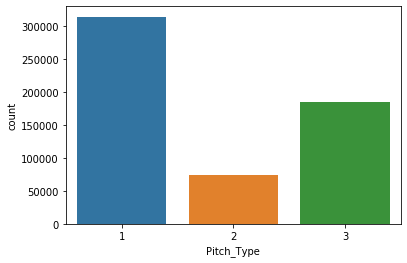

In [5]:
sns.countplot(x=df['Pitch_Type'])

### Split Data

In [6]:
#Split Data
X= df.drop(columns=['Pitch_Type'])
y=df[['Pitch_Type']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train.head()

,inning,run_difference,ball_count,strike_count,outs,pitch_num_ab,on_1b,on_2b,on_3b,batter_stance,Pitcher_name_Andrew Cashner,Pitcher_name_CC Sabathia,Pitcher_name_Carlos Carrasco,Pitcher_name_Carlos Martinez,Pitcher_name_Chris Archer,Pitcher_name_Chris Sale,Pitcher_name_Clayton Kershaw,Pitcher_name_Cole Hamels,Pitcher_name_Corey Kluber,Pitcher_name_Dallas Keuchel,Pitcher_name_Drew Pomeranz,Pitcher_name_Ervin Santana,Pitcher_name_Gerrit Cole,Pitcher_name_Gio Gonzalez,Pitcher_name_Ian Kennedy,Pitcher_name_J.A. Happ,Pitcher_name_Jacob deGrom,Pitcher_name_Jake Arrieta,Pitcher_name_Jake Odorizzi,Pitcher_name_James Shields,Pitcher_name_Jason Hammel,Pitcher_name_Jeff Samardzija,Pitcher_name_Jeremy Hellickson,Pitcher_name_Jimmy Nelson,Pitcher_name_John Lackey,Pitcher_name_Johnny Cueto,Pitcher_name_Jon Lester,Pitcher_name_Jose Quintana,Pitcher_name_Julio Teheran,Pitcher_name_Justin Verlander,Pitcher_name_Kevin Gausman,Pitcher_name_Kyle Gibson,Pitcher_name_Kyle Hendricks,Pitcher_name_Madison Bumgarner,Pitcher_name_Marco Estrada,Pitcher_name_Martin Perez,Pitcher_name_Masahiro Tanaka,Pitcher_name_Max Scherzer,Pitcher_name_Michael Wacha,Pitcher_name_Mike Fiers,Pitcher_name_Mike Leake,Pitcher_name_Rick Porcello,Pitcher_name_Robbie Ray,Pitcher_name_Sonny Gray,Pitcher_name_Taijuan Walker,Pitcher_name_Tanner Roark,Pitcher_name_Trevor Bauer,Pitcher_name_Ubaldo Jimenez,Pitcher_name_Wade Miley,Pitcher_name_Zack Greinke
571027,4,1,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200783,4,5,0,2,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150302,1,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366311,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
378961,2,0,3,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Train Model

#Create the logistic regression object
logit = LogisticRegression(C=1, random_state = 123, solver='saga')

In [8]:
#Fit the model to the training data
logit.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Print the coefficients and intercept of the model

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-7.37286960e-02  2.30375667e-02  2.30791702e-01 -2.05016921e-01
  -5.08712071e-02 -6.50770214e-02  5.63906453e-02 -1.63006399e-01
  -6.01378432e-02 -3.25732937e-02  5.18514640e-01 -1.01753930e+00
  -1.11842764e-01  1.09704223e-01 -1.96121057e-01 -8.81918553e-02
  -1.32861424e-01  4.90582921e-01 -1.13211196e+00  5.42047990e-01
   2.15026946e-01 -4.44544905e-02  8.71119302e-02  2.16214492e-01
   3.69102478e-01  7.04212974e-01  1.94185932e-01 -2.25833705e+00
   3.61938128e-01  3.63422339e-01 -1.20231698e-01  3.62126266e-01
   2.37794493e-03 -1.25589110e+00  1.68069925e+00  3.60368020e-01
   5.72371141e-01 -1.33738778e-01  3.14911091e-01  2.14781800e-01
   4.91949306e-01  1.07753855e-01 -1.60206821e+00  2.30222045e-01
   2.67373562e-01  2.19264631e-01 -1.58760842e+00  1.95360309e-01
   7.03798754e-01  2.20452263e-01 -1.41961754e+00  2.98366922e-01
   4.34786107e-01  3.21049446e-01  8.09394149e-01 -8.55608120e-01
   4.01678037e-01  1.34253627e-01  2.16733077e-01 -1.47947639

In [9]:
#Estimate what type of pitch is next, using the training data

y_pred = logit.predict(X_train)

In [10]:
#Estimate the probability of each pitch, using the training data

y_pred_proba = logit.predict_proba(X_train)

In [11]:
#Evaluate Model

#Compute the accuracy

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.61


In [12]:
#Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[227362     62  24457]
 [ 50493     29   9379]
 [ 93087     37  54339]]


In [13]:
#Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.90      0.73    251881
           2       0.23      0.00      0.00     59901
           3       0.62      0.37      0.46    147463

    accuracy                           0.61    459245
   macro avg       0.49      0.42      0.40    459245
weighted avg       0.56      0.61      0.55    459245



In [14]:
#Test Model

#Compute the accuracy of the model when run on the test data

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.61


## LR = .61

### Decision Tree w/ Cross Validation

In [15]:
#Split Data
X= df.drop(columns=['Pitch_Type'])
y=df[['Pitch_Type']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

X_train.head()

,inning,run_difference,ball_count,strike_count,outs,pitch_num_ab,on_1b,on_2b,on_3b,batter_stance,Pitcher_name_Andrew Cashner,Pitcher_name_CC Sabathia,Pitcher_name_Carlos Carrasco,Pitcher_name_Carlos Martinez,Pitcher_name_Chris Archer,Pitcher_name_Chris Sale,Pitcher_name_Clayton Kershaw,Pitcher_name_Cole Hamels,Pitcher_name_Corey Kluber,Pitcher_name_Dallas Keuchel,Pitcher_name_Drew Pomeranz,Pitcher_name_Ervin Santana,Pitcher_name_Gerrit Cole,Pitcher_name_Gio Gonzalez,Pitcher_name_Ian Kennedy,Pitcher_name_J.A. Happ,Pitcher_name_Jacob deGrom,Pitcher_name_Jake Arrieta,Pitcher_name_Jake Odorizzi,Pitcher_name_James Shields,Pitcher_name_Jason Hammel,Pitcher_name_Jeff Samardzija,Pitcher_name_Jeremy Hellickson,Pitcher_name_Jimmy Nelson,Pitcher_name_John Lackey,Pitcher_name_Johnny Cueto,Pitcher_name_Jon Lester,Pitcher_name_Jose Quintana,Pitcher_name_Julio Teheran,Pitcher_name_Justin Verlander,Pitcher_name_Kevin Gausman,Pitcher_name_Kyle Gibson,Pitcher_name_Kyle Hendricks,Pitcher_name_Madison Bumgarner,Pitcher_name_Marco Estrada,Pitcher_name_Martin Perez,Pitcher_name_Masahiro Tanaka,Pitcher_name_Max Scherzer,Pitcher_name_Michael Wacha,Pitcher_name_Mike Fiers,Pitcher_name_Mike Leake,Pitcher_name_Rick Porcello,Pitcher_name_Robbie Ray,Pitcher_name_Sonny Gray,Pitcher_name_Taijuan Walker,Pitcher_name_Tanner Roark,Pitcher_name_Trevor Bauer,Pitcher_name_Ubaldo Jimenez,Pitcher_name_Wade Miley,Pitcher_name_Zack Greinke
571027,4,1,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
200783,4,5,0,2,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150302,1,0,1,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366311,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
378961,2,0,3,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff?source=search_post---------1
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5, 10, 15],
          'criterion':['gini', 'entropy'],
          'max_features': [None, 3, 5]}

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, params, cv=3, iid=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=True, n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'ma

In [17]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [18]:
test_scores = results['mean_test_score']
test_scores

array([0.59551002, 0.55861904, 0.56111444, 0.61018411, 0.56722664,
       0.58835262, 0.61163431, 0.5836928 , 0.58663676, 0.59550784,
       0.55414212, 0.5698614 , 0.61206981, 0.57223269, 0.58342497,
       0.61042145, 0.57432525, 0.59727161])

In [19]:
params = results['params']
params

[{'criterion': 'gini', 'max_depth': 5, 'max_features': None},
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 3},
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 5},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': None},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 3},
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 5},
 {'criterion': 'gini', 'max_depth': 15, 'max_features': None},
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 3},
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 5},
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': None},
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3},
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 5},
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': None},
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3},
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 5},
 {'criterion': 'entropy', 'max_depth': 15, 'max_features': None},
 {'crit

In [20]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,criterion,max_depth,max_features,score
10,entropy,5,3.0,0.554142
1,gini,5,3.0,0.558619
2,gini,5,5.0,0.561114
4,gini,10,3.0,0.567227
11,entropy,5,5.0,0.569861
13,entropy,10,3.0,0.572233
16,entropy,15,3.0,0.574325
14,entropy,10,5.0,0.583425
7,gini,15,3.0,0.583693
8,gini,15,5.0,0.586637


In [21]:
# entropy 10 none

In [22]:
#Train Model

#Create the Decision Tree Object

# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=43, splitter= 'best')

In [23]:
#Fit the model to the training data

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=43, splitter='best')

In [24]:
#guess pitch

y_pred = clf.predict(X_train)
y_pred[0:10]

array([1, 3, 1, 1, 1, 3, 1, 3, 1, 3])

In [25]:
#Estimate the probability of a pitch type

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.60103638, 0.13742167, 0.26154195],
       [0.15625   , 0.28125   , 0.5625    ],
       [0.60103638, 0.13742167, 0.26154195],
       ...,
       [0.60103638, 0.13742167, 0.26154195],
       [0.60103638, 0.13742167, 0.26154195],
       [0.60103638, 0.13742167, 0.26154195]])

In [26]:
#Accuracy: number of correct predictions over the number of total instances that have been evaluated.

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.61


In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.93      0.73    251881
           2       0.47      0.02      0.04     59901
           3       0.66      0.32      0.43    147463

    accuracy                           0.61    459245
   macro avg       0.58      0.42      0.40    459245
weighted avg       0.60      0.61      0.55    459245



In [28]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.61


## DT= .61